# Importing libraries & data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

In [4]:
#Folder path shortcut
path = '/Users/katherinevaldivia/Desktop/Career Foundry Data Analytics Course work/Data Analytics Immersion/Achievement 6/Citi Bike Analysis '
path

'/Users/katherinevaldivia/Desktop/Career Foundry Data Analytics Course work/Data Analytics Immersion/Achievement 6/Citi Bike Analysis '

In [5]:
citidf = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'citibikeclean_2.csv'), index_col = False)

In [6]:
stationdf = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'NYC_codes'), index_col = False)

# Cleaning data

In [7]:
citidf.head()

,Unnamed: 0.1,Unnamed: 0,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,0,0,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,female
1,1,1,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,male
2,2,2,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,male
3,3,3,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,female
4,4,5,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,female


In [8]:
# Keeping neccessary columns
citidf_1=citidf[['weekday','start_hour','start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude','end_time', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender']]
citidf_1

,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,female
1,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,male
2,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,male
3,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,female
4,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42988,Sat,15,2013-09-28 15:30:14,435,W 21 St & 6 Ave,40.741740,-73.994156,2013-09-28 15:46:29,448,W 37 St & 10 Ave,40.756604,-73.997901,975,Subscriber,1973.0,male
42989,Sun,16,2013-09-01 16:27:11,224,Spruce St & Nassau St,40.711464,-74.005524,2013-09-01 16:52:52,301,E 2 St & Avenue B,40.722174,-73.983688,1541,Subscriber,1975.0,male
42990,Sat,17,2013-09-14 17:32:26,261,Johnson St & Gold St,40.694749,-73.983625,2013-09-14 17:52:17,151,Cleveland Pl & Spring St,40.721816,-73.997203,1191,Subscriber,1970.0,female
42991,Sat,18,2013-09-07 18:08:21,402,Broadway & E 22 St,40.740343,-73.989551,2013-09-07 18:25:51,524,W 43 St & 6 Ave,40.755273,-73.983169,1050,Subscriber,1961.0,female


In [9]:
stationdf.head()

,Unnamed: 0,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides,postalCode
0,0,72,40.767272,-73.993929,5.642857,10019
1,24,173,40.760647,-73.984427,5.233333,10019
2,75,281,40.764397,-73.973715,5.300000,10019
3,138,352,40.763406,-73.977225,5.500000,10019
4,202,422,40.770513,-73.988038,4.620690,10019


In [10]:
#Dropping unnecessary columns
columns_to_drop =['Unnamed: 0']

In [11]:
stationdf=stationdf.drop(columns_to_drop, axis=1)

In [12]:
stationdf.head()

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides,postalCode
0,72,40.767272,-73.993929,5.642857,10019
1,173,40.760647,-73.984427,5.233333,10019
2,281,40.764397,-73.973715,5.300000,10019
3,352,40.763406,-73.977225,5.500000,10019
4,422,40.770513,-73.988038,4.620690,10019


In [13]:
citidf_1.describe()

,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year
count,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000
mean,14.085316,437.205545,40.734477,-73.990948,434.577094,40.734070,-73.991242,770.502105,1975.674459
std,4.932889,340.848654,0.019598,0.012367,332.801118,0.019603,0.012375,523.444233,10.938735
min,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1924.000000
25%,10.000000,304.000000,40.721101,-74.000040,305.000000,40.720828,-74.000271,395.000000,1968.000000
50%,15.000000,402.000000,40.736245,-73.990765,402.000000,40.735877,-73.990985,621.000000,1978.000000
75%,18.000000,485.000000,40.749718,-73.981948,483.000000,40.749013,-73.982578,999.000000,1984.000000
max,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000,1997.000000


/var/folders/kp/9p8z9q3x6113kvlh8pwcxm1r0000gn/T/ipykernel_34978/12700348.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(citidf_1['trip_duration'], bins=60) # Shows extreme values


<Axes: xlabel='trip_duration', ylabel='Density'>

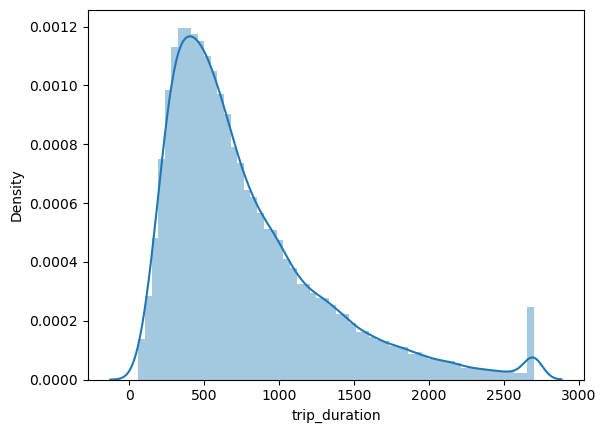

In [14]:
sns.distplot(citidf_1['trip_duration'], bins=60) # Shows extreme values

In [15]:
# Define data types for specific columns
data_types = {
    'start_time': 'datetime64'
}

In [16]:
file_path = os.path.join(path, '02 Data','Prepared Data','citibikeclean_2.csv')

In [17]:
parse_dates = ['start_time']

In [18]:
citidf_1 = pd.read_csv(file_path, parse_dates=parse_dates)

In [19]:
# Amount of rides taken on each hour of each day
hour_counts = citidf_1.groupby(['start_hour',citidf_1['start_time'].dt.date])['start_time'].count()

In [20]:
hour_counts

start_hour  start_time
0           2013-09-01    15
            2013-09-02    15
            2013-09-03     5
            2013-09-04     9
            2013-09-05    13
                          ..
23          2013-09-26    38
            2013-09-27    44
            2013-09-28    48
            2013-09-29    21
            2013-09-30    17
Name: start_time, Length: 711, dtype: int64

In [21]:
# average rides per hour
avg_rides_per_hour = hour_counts.groupby('start_hour').mean().reset_index()

In [22]:
avg_rides_per_hour

,start_hour,start_time
0,0,14.000000
1,1,8.866667
2,2,5.586207
3,3,3.692308
4,4,2.777778
5,5,6.724138
6,6,29.633333
7,7,66.000000
8,8,104.233333
9,9,86.600000


In [23]:
day_counts = citidf_1.groupby('weekday')['start_time'].count().reset_index()

In [24]:
day_counts

,weekday,start_time
0,Fri,6594
1,Mon,6797
2,Sat,4965
3,Sun,5506
4,Thu,6212
5,Tue,6429
6,Wed,6490


In [25]:
day_hour_counts = citidf_1.groupby([ 'weekday','start_hour'])['start_time'].count()

In [26]:
day_hour_counts

weekday  start_hour
Fri      0              48
         1              36
         2              23
         3              10
         4              10
                      ... 
Wed      19            479
         20            297
         21            213
         22            188
         23            103
Name: start_time, Length: 168, dtype: int64

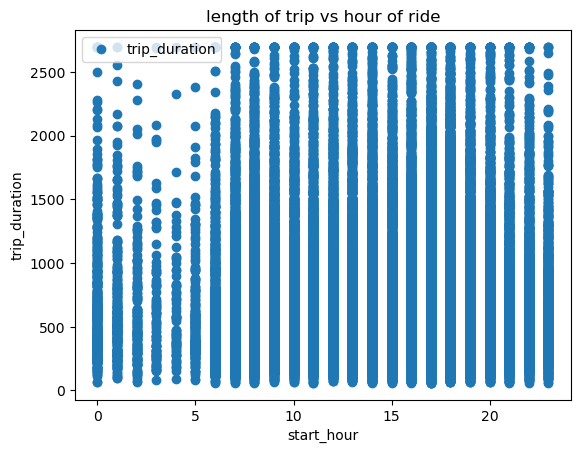

In [27]:
# Creating a scatterplot using matplotlib to look at how the chosen variables plot against each other.

citidf_1.plot(x = 'start_hour', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('length of trip vs hour of ride')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

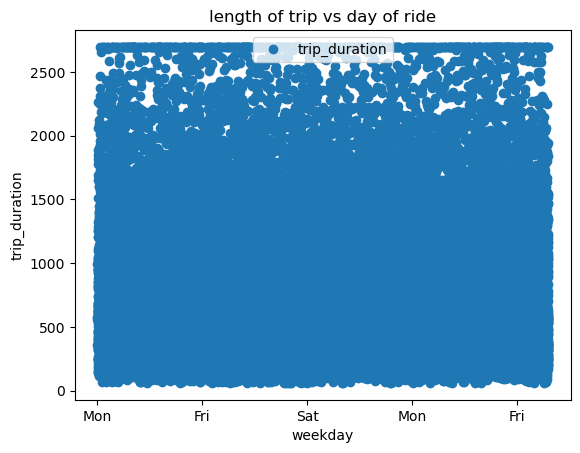

In [28]:
# Creating a scatterplot using matplotlib look at how the chosen variables plot against each other.

citidf_1.plot(x = 'weekday', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('length of trip vs day of ride')  
plt.xlabel('weekday')  
plt.ylabel('trip_duration')  
plt.show()

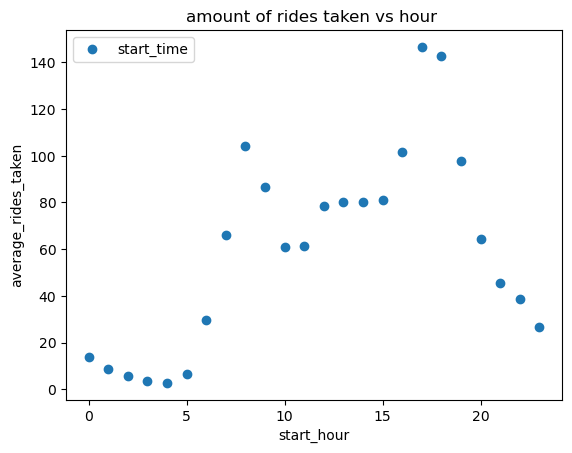

In [29]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

avg_rides_per_hour.plot(x = 'start_hour', y='start_time',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('amount of rides taken vs hour ')  
plt.xlabel('start_hour')  
plt.ylabel('average_rides_taken')  
plt.show()

In [30]:
avg_rides_per_hour

,start_hour,start_time
0,0,14.000000
1,1,8.866667
2,2,5.586207
3,3,3.692308
4,4,2.777778
5,5,6.724138
6,6,29.633333
7,7,66.000000
8,8,104.233333
9,9,86.600000


In [31]:
#Checking cloumn names
citidf_1.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender'],
      dtype='object')

In [32]:
ride_counts = pd.get_dummies(citidf_1, columns=['weekday', 'start_hour'], drop_first=True)

In [33]:
ride_counts.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'start_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'start_hour_1', 'start_hour_2', 'start_hour_3',
       'start_hour_4', 'start_hour_5', 'start_hour_6', 'start_hour_7',
       'start_hour_8', 'start_hour_9', 'start_hour_10', 'start_hour_11',
       'start_hour_12', 'start_hour_13', 'start_hour_14', 'start_hour_15',
       'start_hour_16', 'start_hour_17', 'start_hour_18', 'start_hour_19',
       'start_hour_20', 'start_hour_21', 'start_hour_22', 'start_hour_23'],
      dtype='object')

In [34]:
# rides per hour count
rides_per_hour_count = hour_counts.groupby('start_hour').count().reset_index()

In [35]:
# amount of rides taken on each hour of each day
hour_counts_1 = citidf_1.groupby('start_hour')['start_time'].count()
hour_counts_1

start_hour
0      420
1      266
2      162
3       96
4       75
5      195
6      889
7     1980
8     3127
9     2598
10    1827
11    1841
12    2353
13    2408
14    2401
15    2436
16    3046
17    4398
18    4280
19    2930
20    1932
21    1371
22    1159
23     803
Name: start_time, dtype: int64

In [36]:
hourly_aggregated = citidf_1.groupby('start_hour').agg({
    'start_time': 'count',          # Count of rides
    'trip_duration': 'mean'         # Average trip duration
}).reset_index()
# Checking 
hourly_aggregated

,start_hour,start_time,trip_duration
0,0,420,748.716667
1,1,266,702.657895
2,2,162,659.561728
3,3,96,687.020833
4,4,75,667.106667
5,5,195,605.348718
6,6,889,648.613048
7,7,1980,727.038384
8,8,3127,756.595459
9,9,2598,728.346035


In [37]:
hourly_aggregated.rename(columns={'start_time': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)
#checking 
hourly_aggregated

,start_hour,ride_count,avg_trip_duration
0,0,420,748.716667
1,1,266,702.657895
2,2,162,659.561728
3,3,96,687.020833
4,4,75,667.106667
5,5,195,605.348718
6,6,889,648.613048
7,7,1980,727.038384
8,8,3127,756.595459
9,9,2598,728.346035


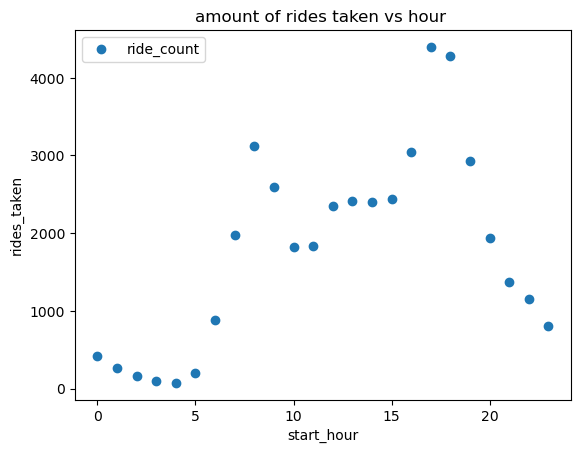

In [38]:
hourly_aggregated.plot(x = 'start_hour', y='ride_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('amount of rides taken vs hour ')  
plt.xlabel('start_hour')  
plt.ylabel('rides_taken')  
plt.show()

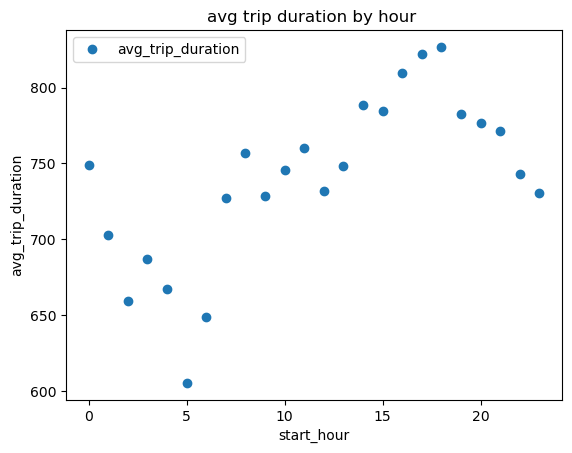

In [39]:
hourly_aggregated.plot(x = 'start_hour', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('avg trip duration by hour ')  
plt.xlabel('start_hour')  
plt.ylabel('avg_trip_duration')  
plt.show()

In [40]:
citidf_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0.1             42993 non-null  int64         
 1   Unnamed: 0               42993 non-null  int64         
 2   weekday                  42993 non-null  object        
 3   start_hour               42993 non-null  int64         
 4   start_time               42993 non-null  datetime64[ns]
 5   start_station_id         42993 non-null  int64         
 6   start_station_name       42993 non-null  object        
 7   start_station_latitude   42993 non-null  float64       
 8   start_station_longitude  42993 non-null  float64       
 9   end_time                 42993 non-null  object        
 10  end_station_id           42993 non-null  int64         
 11  end_station_name         42993 non-null  object        
 12  end_station_latitude     42993 n

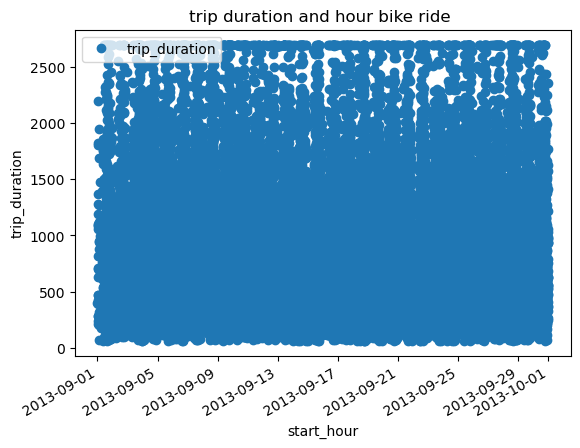

In [41]:
citidf_1.plot(x = 'start_time', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('trip duration and hour bike ride ')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

In [42]:
# Defining data types for specific columns
data_types = {
    'start_time': 'datetime64'
}

In [43]:
file_path_1 = os.path.join(path, '02 Data','Prepared Data','citibikeclean_2.csv')

In [44]:
parse_dates = ['start_time']

In [45]:
citi_1 = pd.read_csv(file_path_1, parse_dates=parse_dates)

In [46]:
citidf_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0.1             42993 non-null  int64         
 1   Unnamed: 0               42993 non-null  int64         
 2   weekday                  42993 non-null  object        
 3   start_hour               42993 non-null  int64         
 4   start_time               42993 non-null  datetime64[ns]
 5   start_station_id         42993 non-null  int64         
 6   start_station_name       42993 non-null  object        
 7   start_station_latitude   42993 non-null  float64       
 8   start_station_longitude  42993 non-null  float64       
 9   end_time                 42993 non-null  object        
 10  end_station_id           42993 non-null  int64         
 11  end_station_name         42993 non-null  object        
 12  end_station_latitude     42993 n

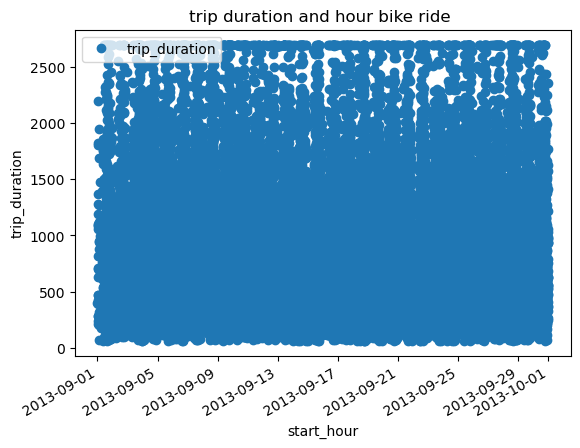

In [47]:
citidf_1.plot(x = 'start_time', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('trip duration and hour bike ride ')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

In [48]:
hourly_aggregated = citidf_1.groupby('start_hour').agg({
    'start_time': 'count',          # Count of rides
    'trip_duration': 'mean'              # Average trip duration
}).reset_index()

In [49]:
hourly_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   start_hour     24 non-null     int64  
 1   start_time     24 non-null     int64  
 2   trip_duration  24 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 704.0 bytes


In [50]:
hourly_aggregated.rename(columns={'start_time': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

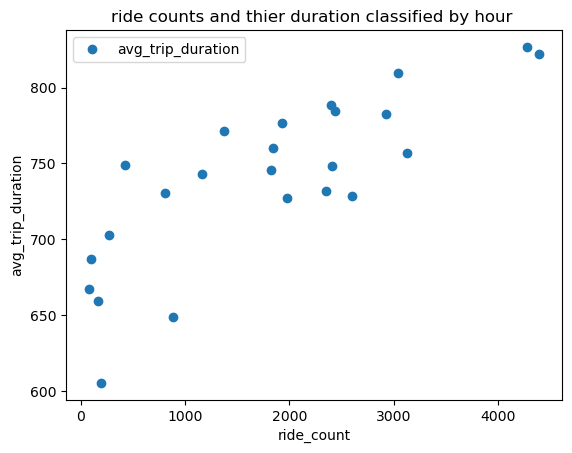

In [51]:
hourly_aggregated.plot(x = 'ride_count', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and thier duration classified by hour ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

## Long rides occur during the busiest hours where rides are mosted used.

In [52]:
#Looking for any outliers using the iqr method.
q1=hourly_aggregated['ride_count'].quantile(0.25)#first Quartile
q3=hourly_aggregated['ride_count'].quantile(0.75)#third Quartile
iqr = q3-q1

In [53]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [54]:
outliers = hourly_aggregated[(hourly_aggregated['ride_count'] < lower_bound) | (hourly_aggregated['ride_count'] > upper_bound)]

In [55]:
outliers

,start_hour,ride_count,avg_trip_duration


In [56]:
q1=hourly_aggregated['avg_trip_duration'].quantile(0.25)#first Quartile
q3=hourly_aggregated['avg_trip_duration'].quantile(0.75)#third Quartile
iqr = q3-q1

In [57]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [58]:
outliers_1 = hourly_aggregated[(hourly_aggregated['avg_trip_duration'] < lower_bound) | (hourly_aggregated['avg_trip_duration'] > upper_bound)]

In [59]:
# I was able to find outliers
outliers_1

,start_hour,ride_count,avg_trip_duration
5,5,195,605.348718


In [60]:
#Looking for outliers within the main dataframe
q1=citidf_1['trip_duration'].quantile(0.25)#first Quartile
q3=citidf_1['trip_duration'].quantile(0.75)#third Quartile
iqr = q3-q1

In [61]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [62]:
outliers_2 = citidf_1[(citidf_1['trip_duration'] < lower_bound) | (citidf_1['trip_duration'] > upper_bound)]
#Checking
outliers_2

,Unnamed: 0.1,Unnamed: 0,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
27,27,31,Thu,16,2013-09-19 16:35:39,471,Grand St & Havemeyer St,40.712868,-73.956981,2013-09-19 17:09:56,388,W 26 St & 10 Ave,40.749718,-74.002950,2057,Subscriber,1954.0,male
55,55,63,Wed,17,2013-09-11 17:11:27,469,Broadway & W 53 St,40.763441,-73.982681,2013-09-11 17:49:09,313,Washington Ave & Park Ave,40.696102,-73.967510,2262,Subscriber,1979.0,female
179,179,208,Mon,14,2013-09-09 14:38:39,342,Columbia St & Rivington St,40.717400,-73.980166,2013-09-09 15:13:32,342,Columbia St & Rivington St,40.717400,-73.980166,2093,Subscriber,1960.0,female
183,183,212,Tue,10,2013-09-24 10:32:52,391,Clark St & Henry St,40.697601,-73.993446,2013-09-24 11:08:16,486,Broadway & W 29 St,40.746201,-73.988557,2124,Subscriber,1957.0,male
197,197,231,Thu,17,2013-09-05 17:31:47,2006,Central Park S & 6 Ave,40.765909,-73.976342,2013-09-05 18:09:18,2006,Central Park S & 6 Ave,40.765909,-73.976342,2251,Subscriber,1963.0,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42837,42837,49809,Sun,18,2013-09-08 18:32:27,448,W 37 St & 10 Ave,40.756604,-73.997901,2013-09-08 19:22:58,514,12 Ave & W 40 St,40.760875,-74.002777,2697,Subscriber,1990.0,female
42902,42902,49886,Tue,7,2013-09-10 07:47:03,278,Concord St & Bridge St,40.697666,-73.984764,2013-09-10 08:24:35,352,W 56 St & 6 Ave,40.763406,-73.977225,2252,Subscriber,1976.0,female
42903,42903,49887,Sun,16,2013-09-22 16:10:00,242,Flushing Ave & Carlton Ave,40.697883,-73.973503,2013-09-22 17:25:53,526,E 33 St & 5 Ave,40.747659,-73.984907,2697,Subscriber,1965.0,male
42909,42909,49893,Mon,16,2013-09-09 16:13:08,493,W 45 St & 6 Ave,40.756800,-73.982912,2013-09-09 17:13:59,501,FDR Drive & E 35 St,40.744219,-73.971212,2697,Subscriber,1968.0,male


In [63]:
#looking at outliers_2 shape
outliers_2.shape

(1976, 18)

In [64]:
#looking at citidf data shape
citidf_1.shape

(42993, 18)

In [65]:
#removing all outliers
filtered_citi = citidf_1[(citidf_1['trip_duration'] >= lower_bound) & (citidf_1['trip_duration'] <= upper_bound)]

In [66]:
# checking shape of filtered_citi
filtered_citi.shape

(41017, 18)

# Reshaping the variables into NumPy arrays and putting them into separate objects.

In [67]:
hourly_aggregated_filtered = filtered_citi.groupby('start_hour').agg({
    'start_time': 'count',          # Count of rides
    'trip_duration': 'mean'              # Average trip duration
}).reset_index()


In [68]:
hourly_aggregated_filtered

,start_hour,start_time,trip_duration
0,0,403,677.868486
1,1,257,647.210117
2,2,158,620.936709
3,3,90,584.422222
4,4,73,616.589041
5,5,191,570.586387
6,6,863,598.979143
7,7,1908,668.484277
8,8,3023,705.284155
9,9,2504,668.774760


In [69]:
hourly_aggregated_filtered.rename(columns={'start_time': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

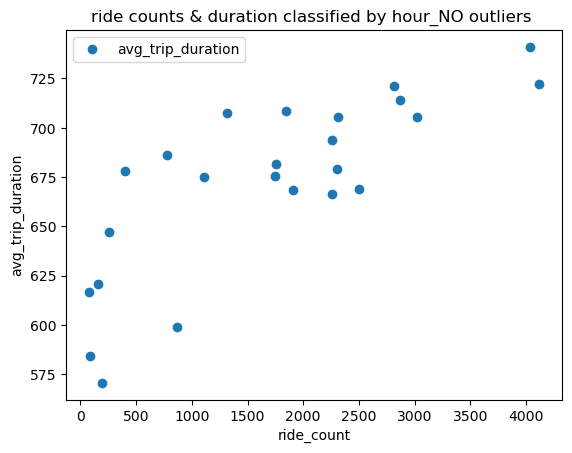

In [70]:
hourly_aggregated_filtered.plot(x = 'ride_count', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts & duration classified by hour_NO outliers ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

In [71]:
X_1 = hourly_aggregated_filtered['ride_count'].values.reshape(-1,1)
y_1 = hourly_aggregated_filtered['avg_trip_duration'].values.reshape(-1,1)

In [72]:
# Splitting data into a training set and a test set.

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

In [73]:
# Fitting the regression object onto the training set.

regression.fit(X_1_train, y_1_train)

NameError: name 'regression' is not defined

In [ ]:
# Predicting the values of y using X. applying model to X test only

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_1_predicted = regression.predict(X_1_test)

In [ ]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='gray', s = 15)
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth =3)
plot_test_1.title('ride counts and trip duration no outliers (Test set)')
plot_test_1.xlabel('ride_counts')
plot_test_1.ylabel('average_trip_duration')
plot_test_1.show()

# The graph above displays a positive regression. This graph tells us that the more rides that occur the longer the trip duration. While the line does display a positive regression its not exactly close to a lot of the plots.

In [ ]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_1_test, y_1_predicted) # This is the mean squared error
r2 = r2_score(y_1_test, y_1_predicted) # This is the R2 score. 

In [ ]:
# Printing the model summary statistics. To evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

In [ ]:
# Creating a dataframe comparing the actual and predicted values of y.

data_1 = pd.DataFrame({'Actual': y_1_test.flatten(), 'Predicted': y_1_predicted.flatten()})
data_1.head(8)

# I'd have to say that the test didn't perform as well as I'd hope. When comparing the data to the predictor you see that it is off. Also the MSE score  is really high which suggests a bad relationship.

# This dataset seems more categorical making it difficult for the linear regression to have 2 numerical variable and a relationship.

## Removing outliers did not make a significant difference

In [ ]:
hourly_aggregated_filtered.head()

In [ ]:
citi_1.head()

In [ ]:
citi_clean=citi_1[['weekday','start_hour','start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender']]

In [ ]:
hourly_aggregated_filtered.head()

In [ ]:
hourly_aggregated_filtered['avg_trip_duration_min']=hourly_aggregated_filtered['avg_trip_duration']/60

In [ ]:
hourly_aggregated_filtered

In [ ]:
hourly_aggregated_filtered.plot(x = 'avg_trip_duration_min', y='ride_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts & duration classified by hour_NO outliers ')  
plt.xlabel('avg_trip_duration_minutes')  
plt.ylabel('ride_count')  
plt.show()

In [ ]:
X_1 = hourly_aggregated_filtered['avg_trip_duration_min'].values.reshape(-1,1)
y_1 = hourly_aggregated_filtered['ride_count'].values.reshape(-1,1)

In [ ]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_1_predicted = regression.predict(X_1_test)

In [ ]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='blue', s = 15)
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth =3)
plot_test_1.title('ride counts & trip duration_ NO outliers (Test set)')
plot_test_1.xlabel('avg_trip_duration_min')
plot_test_1.ylabel('ride_counts')
plot_test_1.show()

In [ ]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_1_test, y_1_predicted) # This is the mean squared error
r2 = r2_score(y_1_test, y_1_predicted) # This is the R2 score. 

In [ ]:
# Printing the model summary statistics, where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

In [ ]:
ride_counts.head()

In [ ]:
X=hourly_aggregated_filtered[['start_hour','avg_trip_duration']]

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X)
y = hourly_aggregated_filtered['ride_count']

In [ ]:
model = sm.OLS(y, X).fit()


In [ ]:
print(model.summary())

In [ ]:
# Defining the predictor variable (Start_hour) & dependent variables (count & avg_trip_diration)
X = hourly_aggregated_filtered['start_hour']
y_count = hourly_aggregated_filtered['ride_count']
y_avg_duration = hourly_aggregated_filtered['avg_trip_duration']


In [ ]:
X = sm.add_constant(X)

In [ ]:
model_count = sm.OLS(y_count, X).fit()

In [ ]:
model_avg_duration = sm.OLS(y_avg_duration, X).fit()


In [ ]:
print("Model for Count of Rides:")
print(model_count.summary())
print("\nModel for Average Trip Duration:")
print(model_avg_duration.summary())

In [ ]:
X = hourly_aggregated_filtered[['avg_trip_duration', 'start_hour']]
X = sm.add_constant(X)

In [ ]:
y = hourly_aggregated_filtered['ride_count']

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

In [ ]:
#Ride counts vs Predictors
plt.figure(figsize=(10, 6))
sns.regplot(x='avg_trip_duration', y='ride_count', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x='start_hour', y='ride_count', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='start_hour')
plt.title('Ride Counts vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('Ride Count')
plt.legend()
plt.show()

In [ ]:
X = hourly_aggregated_filtered[['ride_count', 'start_hour']]
X = sm.add_constant(X)

In [ ]:
y = hourly_aggregated_filtered['avg_trip_duration']

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

In [ ]:
#Plotting Ride counts vs Predictors
plt.figure(figsize=(10, 6))
sns.regplot(x='avg_trip_duration', y='ride_count', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x='start_hour', y='ride_count', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='start_hour')
plt.title('Ride Counts vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('Ride Count')
plt.legend()
plt.show()

In [ ]:
X = hourly_aggregated_filtered[['ride_count', 'start_hour']]
X = sm.add_constant(X)

In [ ]:
y = hourly_aggregated_filtered['avg_trip_duration']

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

In [ ]:
#Plotting average trip diration vs Predictors
plt.figure(figsize=(10, 6))
sns.regplot(x='ride_count', y='avg_trip_duration', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x='start_hour', y='avg_trip_duration', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='start_hour')
plt.title('avg_trip_duration vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('avg_trip_duration')
plt.legend()
plt.show()

In [ ]:
# Reshaping the variables into NumPy arrays
X_avg_trip_duration = hourly_aggregated_filtered['ride_count'].values
y_avg_trip_duration = hourly_aggregated_filtered['avg_trip_duration'].values

X_start_hour = hourly_aggregated_filtered['start_hour'].values
y_avg_trip_duration = hourly_aggregated_filtered['avg_trip_duration'].values

In [ ]:
#Replotting average trip duration vs predictors
plt.figure(figsize=(10, 6))
sns.regplot(x=X_avg_trip_duration, y=y_avg_trip_duration, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x=X_start_hour, y=y_avg_trip_duration, scatter_kws={'s': 50}, label='start_hour')
plt.title('avg_trip_duration vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('avg_trip_duration')
plt.legend()
plt.show()

In [ ]:
X = hourly_aggregated_filtered[['ride_count', 'start_hour']]  
y = hourly_aggregated_filtered['avg_trip_duration']  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

In [ ]:
# Creating a regression object.
regression = LinearRegression() 

In [ ]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

In [ ]:
# Predicting the values of y using X. applying model only to X test

# By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_predicted = regression.predict(X_test)

In [ ]:
# Defining the predictor variables (X) and the target variable (y)
X = hourly_aggregated_filtered[['ride_count', 'start_hour']]  
y = hourly_aggregated_filtered['avg_trip_duration']  

# Make sure X and y have the same number of data points
assert len(X) == len(y), "X and y must have the same number of data points"

In [ ]:
y_predicted = fitted_model.predict(X_test)

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

In [ ]:
y

In [ ]:
X

In [ ]:
#Checking citidf
citidf_1.head()

In [ ]:
citidf_1_clean=citidf_1[['weekday','start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender']]

In [ ]:
#Checking clean citidf
citidf_1_clean

In [ ]:
# checking the first 5 rows of the filtered df
filtered_citi.head()

In [ ]:
citi_1_clean=filtered_citi[['weekday','start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender']]

In [ ]:
# Saving to clean df csv
citi_1_clean.to_csv(os.path.join(path, '02 Data','Prepared Data', 'citibikeclean_3.csv'))